In [4]:
#import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sklearn as skl
#import tensorflow as tf

In [2]:
#import the data to pandas and display it
loan_df=pd.read_csv('Resources/loan_data.csv')
loan_df=loan_df.drop(columns=['DAYS_EMPLOYED','NAME_INCOME_TYPE'])
loan_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,Core staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Secondary / secondary special,With parents,Sales staff
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Secondary / secondary special,House / apartment,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Higher education,House / apartment,Managers
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Secondary / secondary special,House / apartment,Laborers


In [3]:
loan_df = loan_df.dropna()


In [4]:
loan_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,Core staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Secondary / secondary special,House / apartment,Sales staff
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Secondary / secondary special,With parents,Sales staff
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Higher education,House / apartment,Managers
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Secondary / secondary special,House / apartment,Laborers


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210887 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           210887 non-null  int64  
 1   TARGET               210887 non-null  int64  
 2   NAME_CONTRACT_TYPE   210887 non-null  object 
 3   CODE_GENDER          210887 non-null  object 
 4   FLAG_OWN_CAR         210887 non-null  object 
 5   FLAG_OWN_REALTY      210887 non-null  object 
 6   CNT_CHILDREN         210887 non-null  int64  
 7   AMT_INCOME_TOTAL     210887 non-null  float64
 8   AMT_CREDIT           210887 non-null  float64
 9   AMT_ANNUITY          210887 non-null  float64
 10  AMT_GOODS_PRICE      210887 non-null  float64
 11  NAME_EDUCATION_TYPE  210887 non-null  object 
 12  NAME_HOUSING_TYPE    210887 non-null  object 
 13  OCCUPATION_TYPE      210887 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 24.1+ MB


In [6]:
loan_df = pd.get_dummies(loan_df, columns=['NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'], drop_first=True, dtype=int)
loan_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,0,153000.0,331920.0,16096.5,225000.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Split our preprocessed data into our features and target arrays
y = loan_df['TARGET']
X = loan_df.drop(columns=['TARGET'])
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=78)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [10]:
# Train the data
classifier.fit(X_train, y_train)

c:\Users\vidya\.conda\envs\PythonData_2024_04\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [11]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9122814782031423
Testing Data Score: 0.9116877204961875


In [12]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
276955,0,0
1193,0,0
215213,0,0
69374,0,0
242120,0,0
...,...,...
183138,0,0
167326,0,0
133712,0,0
245369,0,0


In [17]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9116877204961875

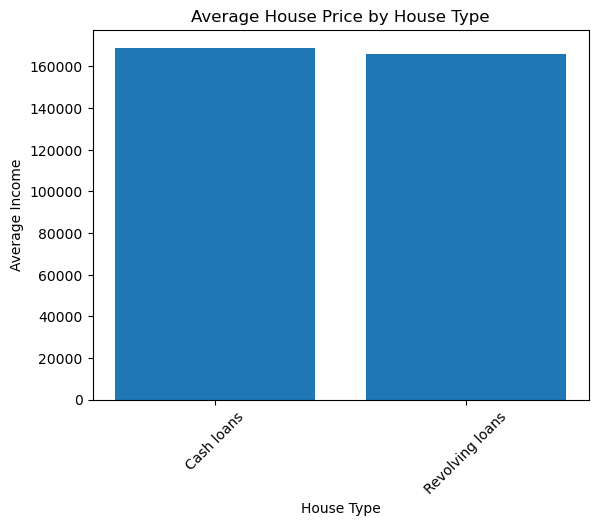

In [7]:
loan_df_new=pd.read_csv('Resources/loan_data.csv')
loan_df_new=loan_df_new.drop(columns=['DAYS_EMPLOYED','NAME_INCOME_TYPE'])

avg_price = loan_df_new.groupby('NAME_CONTRACT_TYPE')['AMT_INCOME_TOTAL'].mean().reset_index()

import matplotlib.pyplot as plt

plt.bar(avg_price['NAME_CONTRACT_TYPE'], avg_price['AMT_INCOME_TOTAL'])
plt.title('Average House Price by House Type')
plt.xlabel('Loan Type')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()